# Matplotlib Introduction

Matplotlib is a plotting library.

## Figures and Axes

The main class where all plots lie is the `Figure` class.
<br>
Figures can be created in the following ways:
<br>
 - using `pyplot.figure`.
 - using `pyplot.subplots`.
 - using `pyplot.subplot_mosaic`.
<br><br>
The `pyplot.subplots` and `pyplot.subplot_mosaic` methods create an additional `Axes` - the main part of a `Figure` that is manipulable.

In [2]:
import matplotlib.pyplot as plt #the library's main plotting module

<Axes: >

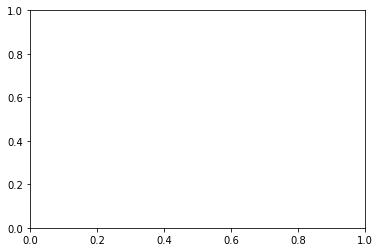

In [24]:
fig = plt.figure() #plotting a figure only without any axes
fig.add_axes(111) #Adding an axes object

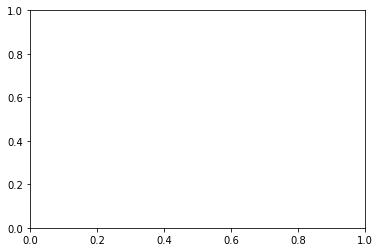

In [3]:
fig, ax = plt.subplots() #The pyplot.subplot() returns a Figure object and an Axes object
#Only one axis object is returned as rows = cols = 1

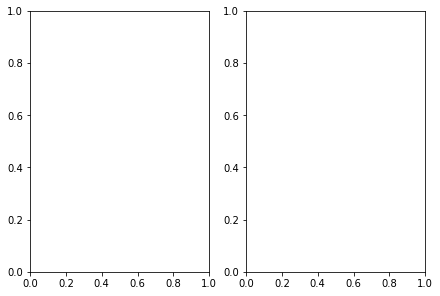

In [4]:
fig, axs = plt.subplots(1, 2, layout='constrained') #subplots also takes arguments 
#rows = 1, cols = 2;
# Constrained layout is a type of layout that automatically adjusts subplots
# so that decorations like tick labels, legends, and colorbars do not overlap

In [5]:
#axs above is an ndarray of Matplotlib Axes objects
#the size of the array tells the number of Axes in a figure
type(axs[0]) #matplotlib.axes._axes.Axes
axs.size

2

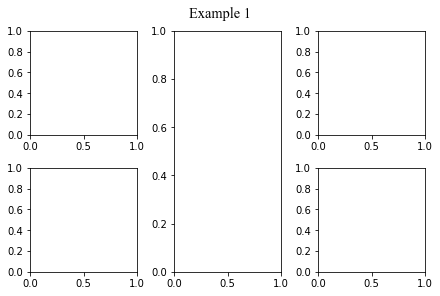

In [6]:
#More complex subplots can be created using pyplot.subplot_mosaic
#The first argument is a mosaic specifying how you want the layout of your
#figure to look like

#A 2 by 3 mosaic wth all Axes being one row by one col length except 
#Two which is two rows long
mosaic = [["One", "Two", "Three"],
          ["Four", "Two", "FIve"]]

fig, axs_dict = plt.subplot_mosaic(mosaic, layout='constrained')

#Labeleing the figure
#Figure.suptitle() returns a Text object (matplotlib.text.Text) that allows fine-grained control
#on the text
mtxt =  fig.suptitle("Example 1")

#Examples of controls we can have over the text
mtxt.set_font('times new roman')
mtxt.set_fontsize('x-large')

In [7]:
#pyplot.subplot_mosaic returns a figure object and a
#dictionary dict({label|str : Axes object})
type(axs_dict["One"])

matplotlib.axes._axes.Axes

We can label the Axes in a `Figure`. We will see this below.

## A word on Axes

<div>
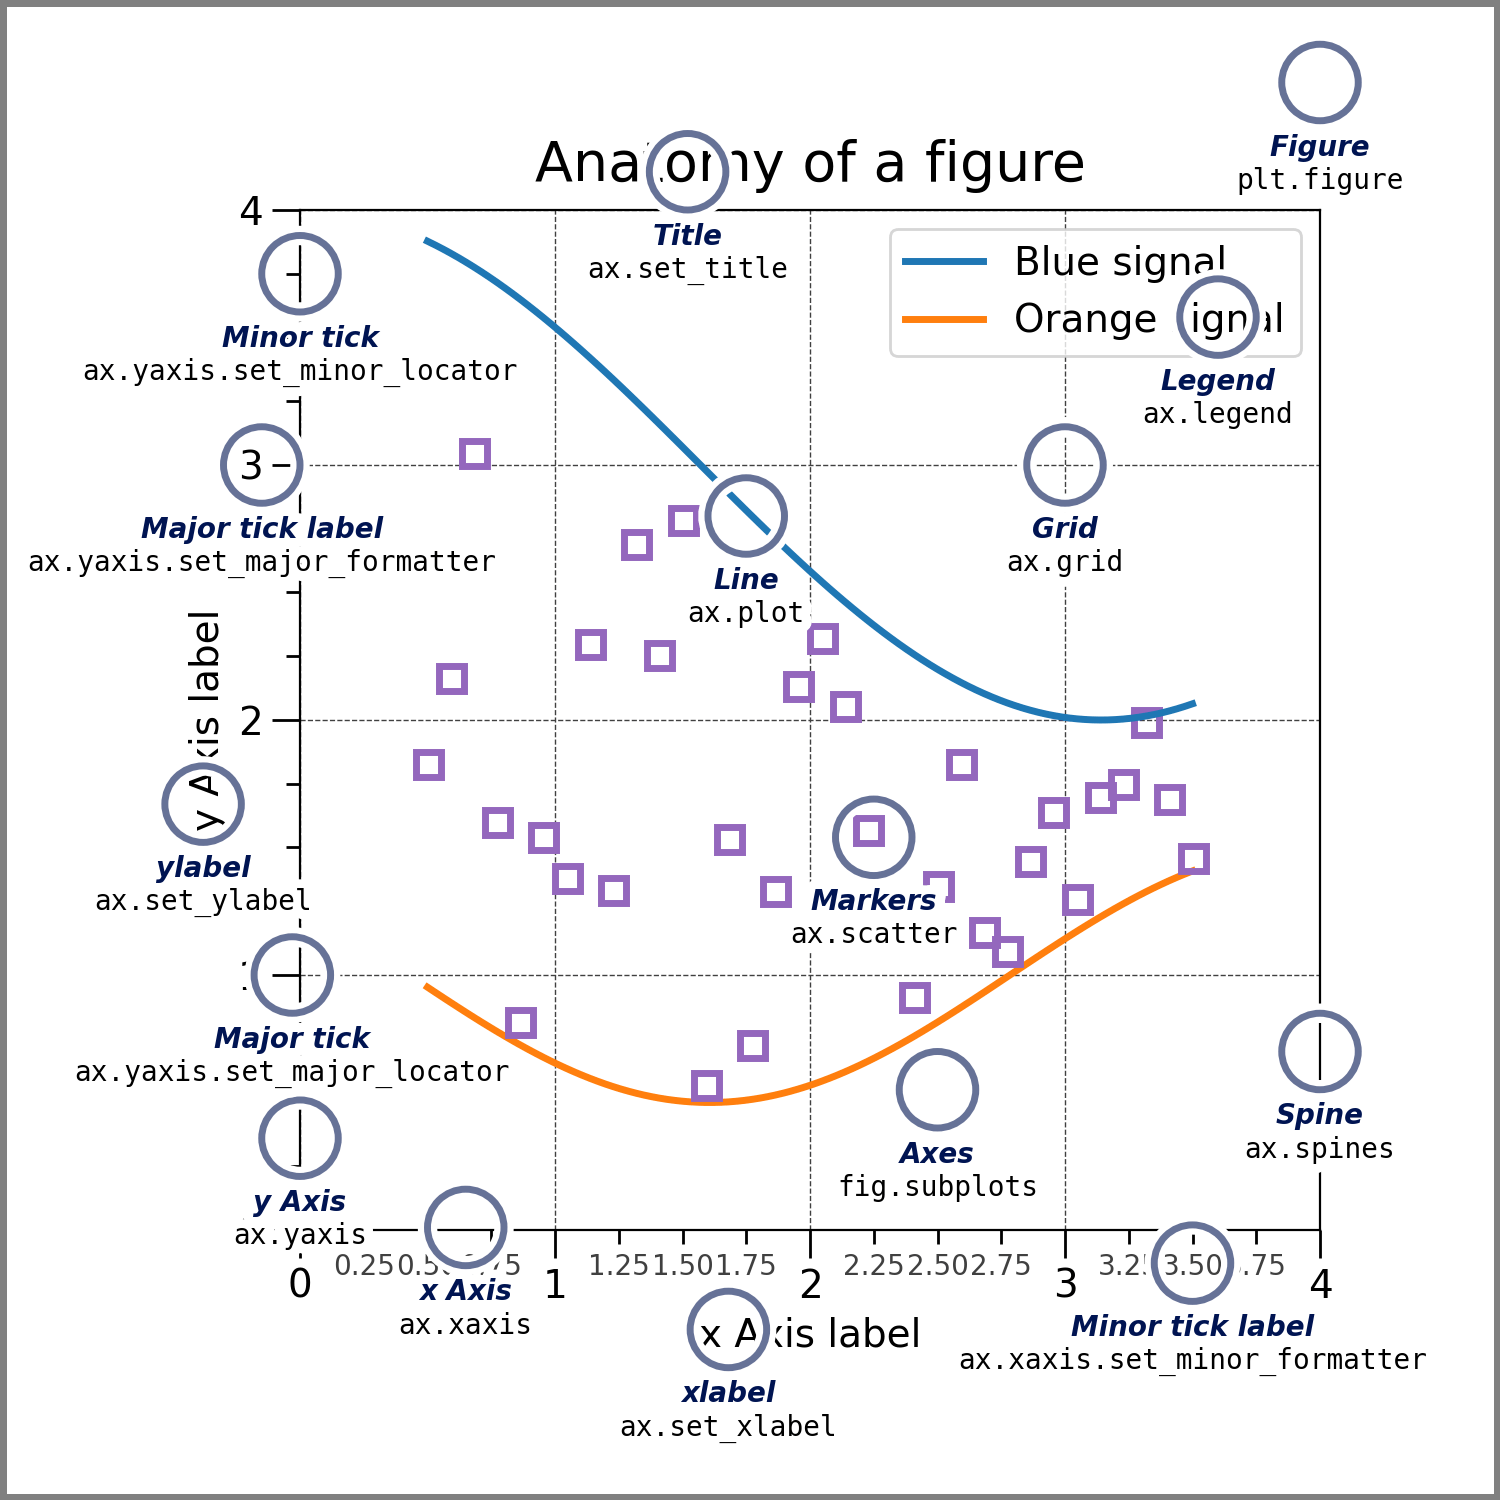
</div>

The image above, from MatplotLib's docs , [the docs](https://matplotlib.org/stable/users/explain/axes/axes_intro.html), shows the anatomy of a figure.
<br>
Of importance:
<br>
 - The `Axes` object is made using `Figure.subplot()`
 - The rest of the elements in the figure are made using methods accessible through an `Axes` object.

The `Axes` is fundamental to most of Matplotlib's functionality and the gateway to data visualizations in Matplotlib.
<br>
As we have seen above, we can create an `Axes` object indirectly using `pyplot.subplot` which also creates a `Figure`. Or, we can also do it directly on an already created figure using the `Figure.subplot` method. We can also do it using `Figure.add_axes` method.

Much of the work that we do in Matplotlib will be done through `Axes` objects.

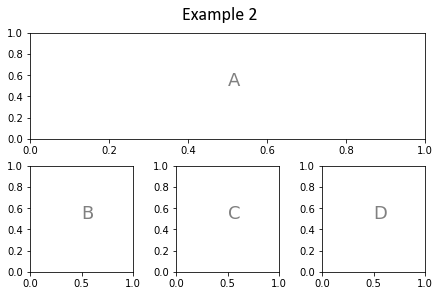

In [8]:
mosaic = [["A", "A", "A"],
          ["B", "C", "D"]]

fig, axs = plt.subplot_mosaic(mosaic, layout="constrained")

#we are going to annotate the various axes
for label, ax in axs.items():
    ax.annotate(label, (0.5, 0.5), fontsize=18, color='grey')
    
#Naming the figure
fig_txt = fig.suptitle('Example 2')
fig_txt.set_font("calibri")
fig_txt.set_fontsize(18)

We can set multiple properties in an `Axes` object using `Axes.set()` method.

## A word on Artists

Matplotlib has what it calls `Artists`. According to [the docs](https://matplotlib.org/stable/users/explain/artists/artist_intro.html) for the `Artist` class, every object you interact with in Matplotlib is an artist. Furthermore, **every** object inherits from the `Artist` class. See the [inheritance diagram](https://matplotlib.org/stable/api/artist_api.html#inheritance-diagrams).

In [9]:
#Relevance explained below
type(fig_txt)

matplotlib.text.Text

In [10]:
fig.suptitle

<bound method FigureBase.suptitle of <Figure size 432x288 with 4 Axes>>

Artists are not created directly but are returned from a method on the `Axes` object. Let me explain.
From 'Example 2' above, under **A word on Axes**, we can see that the method `FigureBase.suptitle` (by which we've named the example) returns an object which we store in `fig_txt`.
<br>
<br>
We then use the object to further manipulate the figure's title.
When we examine the type of `fig_txt` we find that it is a `Text` object (which is an Axes object). `fig_txt` allows us to save the `Text` Artist through the method `FigureBase.suptitle`.

`fig_txt` allows us to access all the properties of `Text` as seen below.

In [11]:
dir(fig_txt)

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_antialiased',
 '_autopos',
 '_axes',
 '_bbox_patch',
 '_callbacks',
 '_char_index_at',
 '_charsize_cache',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_color',
 '_different_canvas',
 '_fontproperties',
 '_fully_clipped_to_axes',
 '_get_dist_to_box',
 '_get_layout',
 '_get_multialignment',
 '_get_rendered_text_width',
 '_get_wrap_line_width',
 '_get_wrapped_text',
 '_get_xy_display',
 '_gid',
 '_horizontalalignment',
 '_in_layout',
 '_internal_update',
 '_label',
 '_linespacing',
 '_mouseover',
 '_multialignment',
 '_pa

We can examine settable properties using `matplotlib.artist.getp`.

In [12]:
from matplotlib.artist import getp as getproperties
getproperties(fig_txt) #settable properties

    agg_filter = None
    alpha = None
    animated = False
    antialiased = True
    bbox_patch = None
    children = []
    clip_box = None
    clip_on = True
    clip_path = None
    color or c = black
    figure = Figure(432x288)
    fontfamily or family or fontname = ['calibri']
    fontname or name = Calibri
    fontproperties or font or font_properties = calibri:style=normal:variant=normal:weight=normal:...
    fontsize or size = 18.0
    fontstyle or style = normal
    fontvariant or variant = normal
    fontweight or weight = normal
    gid = None
    horizontalalignment or ha = center
    in_layout = True
    label = 
    math_fontfamily = dejavusans
    mouseover = False
    parse_math = True
    path_effects = []
    picker = None
    position = (0.5, 0.9895825)
    rasterized = False
    rotation = 0.0
    rotation_mode = default
    sketch_params = None
    snap = None
    stretch = normal
    text = Example 2
    tightbbox = Bbox(x0=178.25, y0=268.99976000000004, x1=253

## Plotting
All we've been doing is making Figures and Axes. We are going to plot data!

In [13]:
#Random data
import numpy as np #Create random data

In [14]:
#Create a generator
rng = np.random.default_rng(seed=42643801)

In [15]:
t = np.arange(100)
x = np.cumsum(rng.integers(0, 1000, 100))

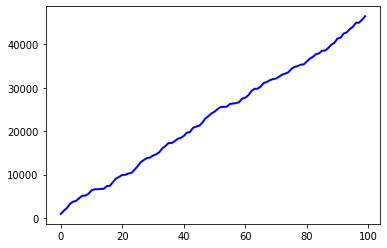

In [16]:
#Creating the Figure object
fig = plt.figure()
ax = fig.subplots()

#ax.plot() returns a list of line2D objects that can allow more fine-grained
#control of the lines
line = ax.plot(t, x, color='blue', lw = 2.0)

### Types of plots available in Matplotlib

There are various plot types available in Matplotlib. Some of the common ones are:
<br>
- line plot
- bar chart
- scatter plot
- histogram

### Line plot
This is simply plotting `y` against `x` as lines or markers. Uses the `Axes.plot()` method. An example:

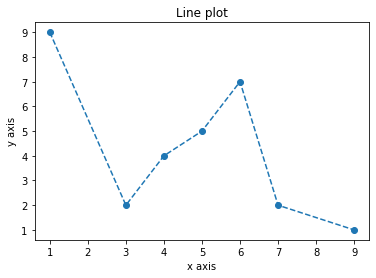

In [17]:
fig_a, ax_a = plt.subplots()
#The Axes object contains the plotting method
lines = ax_a.plot([1,3,4,5,6,7,9], [9, 2,4,5,7,2,1], linestyle='--', marker='o')
set_ret = ax_a.set(title='Line plot', xlabel='x axis', ylabel='y axis')

### Bar Charts

They are used to compare categorical data where there are 2 or more variables for comparison. Uses the `Axes.bar()` method. An example:

In [18]:
#Setting the position of the bars on the x-axis
pos_x = 0.5 + np.arange(10)
#Setting the height of the bars
height = 1 + np.floor(13 * rng.random(10))

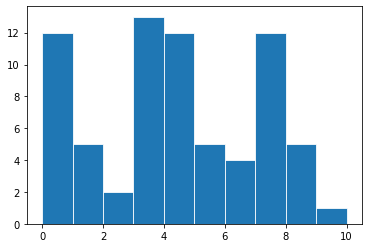

In [20]:
#plotting
fig_b, ax_b = plt.subplots()
b_container = ax_b.bar(pos_x, height, width=1, edgecolor="white", linewidth=0.8)

The `Axes.bar()` method returns a `BarContainer` object (see below). This object contains the as many `Bar` artists as the no. of bars in the bar chart. For example, the `b_container` above will hold 10 bars.

In [21]:
b_container #corresponding to the no. of data points

<BarContainer object of 10 artists>

The bar artists can be accessed through the `patches` attribute of the `BarContainer` class. The patches attribute returns a list holding the bar artists as `matplotlib.patches.Rectangle` objects.

In [27]:
b_container.patches

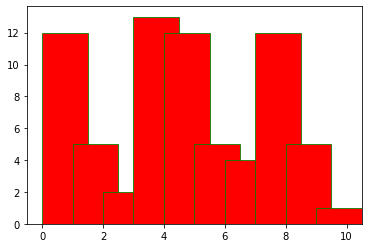

In [32]:
#We can change the values of the bars by accessing them in patches
for elem in b_container.patches:
    elem.set(width=1.5, color='red', edgecolor='green')
fig_b

### Scatter plot

A scatter plot is used to study the relationship between two variables. We will use the `Axes.scatter()` method, as below:

In [66]:
#Building the data

#x, y positions of the data
elems = 24 
x = 4 + rng.normal(0, 2, elems)
y = 4 + rng.normal(0, 2, elems)

#The method also allows us to specify size & color of each (x, y)
#Take a uniform distribution for sizes & colors
sizes = rng.uniform(15, 80, elems)
colors = rng.uniform(15, 80, elems)

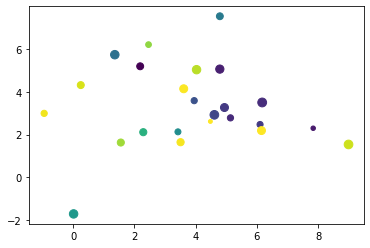

In [67]:
#plotting
fig_c, ax_c = plt.subplots()
p_collection = ax_c.scatter(x, y, s=sizes, c=colors)

Like the box plot above, the `Axes.scatter()` method returns an object, in this case a `matplotlib.collections.PathCollection` object.

In [69]:
p_collection

More customizations to size, color and other parameters exist for the `Axes.scatter()` method in the directory.

### Histogram

Whereas the other plots described above are provided under the pairwise data in the Matplotlib tutorial, the histogram is titled under statistical distributions.
<br>
<br>
It can be called, like others, through an `Axes` object, by accessing the `Axes.hist()` method.

In [104]:
#Build the data
hist_x = rng.uniform(15, 80, 24)

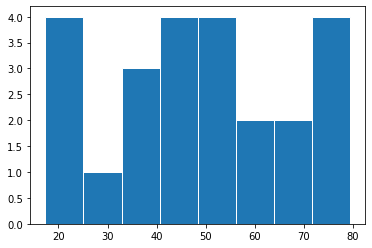

In [108]:
fig_d = plt.figure()
ax_d = fig_d.subplots()

#The object returned is a BarContainer object described in bar charts below
# we use '_' to ignore the returned object
_ = ax_d.hist(hist_x, bins=8, edgecolor='w')

Obviously, there are more modules, classes and methods in the Matplotlib library. The gentle introduction here gives an idea of what Matplotlib can do and what to expect from it.